# Task 4: Optimize Portfolio Based on Forecast

## 1. Load Historical Data
- Load historical data for Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).
- Combine data into a single DataFrame.

## 2. Prepare DataFrame
- Create a DataFrame with columns: TSLA, BND, SPY.
- Ensure the data is aligned by date.

## 3. Calculate Returns
- Compute daily returns for each asset.
- Calculate the annualized return.

## 4. Covariance Matrix
- Compute the covariance matrix of the daily returns to understand asset relationships.

## 5. Define Portfolio Weights
- Set initial portfolio weights.
- Calculate the weighted average return and risk (volatility).

## 6. Optimize Portfolio
- Use optimization techniques to maximize the Sharpe Ratio.
- Adjust allocations based on forecasted volatility.

## 7. Risk and Return Analysis
- Calculate the average portfolio return.
- Measure standard deviation (volatility) of portfolio returns.
- Calculate Value at Risk (VaR) for Tesla stock.
- Calculate the Sharpe Ratio.

## 8. Visualizations
- Visualize cumulative returns and risk-return analysis.

## 9. Summarize Findings
- Document expected return, volatility, Sharpe Ratio, and adjustments made.
- Include cumulative return charts and risk-return analysis.

In [ ]:
%load_ext autoreload

In [24]:
%autoreload 2

In [35]:
# Import necessary libraries
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../scripts/")


from data_loader import load_all_data
from returns_calculator import calculate_daily_returns
from portfolio_optimizer import optimize_portfolio,portfolio_performance, negative_sharpe
from risk_analyzer import calculate_var



In [36]:
# Load data
tsla_file = '../data/TSLA_historical_data.csv'
bnd_file = '../data/BND_historical_data.csv'
spy_file = '../data/SPY_historical_data.csv'
tsla_data, bnd_data, spy_data = load_all_data(tsla_file, bnd_file, spy_file)




In [37]:
# Calculate daily returns
returns = calculate_daily_returns(pd.concat([tsla_data, bnd_data, spy_data], axis=1))

returns.columns = ['TSLA', 'BND', 'SPY']  # Assign unique names



In [38]:
# Calculate annualized return and covariance matrix
annual_return = returns.mean() * 252
cov_matrix = returns.cov() * 252



In [39]:
# Optimize portfolio
optimal_weights = optimize_portfolio(annual_return, cov_matrix)




In [40]:
# Calculate optimal portfolio performance
optimal_return, optimal_std_dev = portfolio_performance(optimal_weights, annual_return, cov_matrix)
sharpe_ratio = optimal_return / optimal_std_dev



In [41]:
print(returns.columns)

Index(['TSLA', 'BND', 'SPY'], dtype='object')


In [42]:
# Calculate Value at Risk (VaR)
var = calculate_var(returns['TSLA'], 0.95)



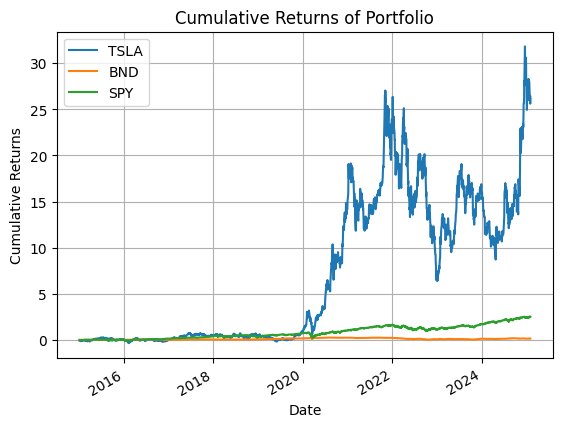

In [43]:
# Visualizations
cumulative_returns = (1 + returns).cumprod() - 1
cumulative_returns.plot(title='Cumulative Returns of Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()




In [44]:
# Summary
print(f'Optimal Weights: {optimal_weights}')
print(f'Expected Annual Return: {optimal_return:.2f}')
print(f'Expected Volatility: {optimal_std_dev:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Value at Risk (VaR) at 95% confidence: {var:.2f}')

Optimal Weights: [0.14486335 0.48812159 0.36701506]
Expected Annual Return: 0.13
Expected Volatility: 0.13
Sharpe Ratio: 0.99
Value at Risk (VaR) at 95% confidence: 0.05
